In [1]:
import sys
sys.path.append("../..") 

In [79]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [31]:
# args
RES_PATH = "../../experiments/mimic3/sept28/"

In [74]:
def get_metrics_from_folder(path):
    df_tests = []
    for folder in os.listdir(path):
        pathm = os.path.join(path, folder, "metrics.csv")
        pathc = os.path.join(path, folder, "checkpoints/")
        # model name:
        for _, _, files in os.walk(pathc):
            file = [f for f in files if f.endswith('.ckpt')][0]
            chk_path = os.path.join(pathc,file)
        checkpoint = torch.load(chk_path)
        model_name = checkpoint["hyper_parameters"]['net']
        # model results:
        df = pd.read_csv(pathm)
        df_test = df.loc[:,df.columns.str.startswith('test') | df.columns.str.startswith('int')]
        df_test = df_test.dropna()
        df_test.loc[:,'model'] = model_name
        df_tests.append(df_test)
    df_test = pd.concat(df_tests, axis=0)
    return df_test

In [77]:
df_test = get_metrics_from_folder(RES_PATH)

In [78]:
df_test

,test_loss,test_rmse,test_var_pit,test_crps,test_ignorance,test_int_score,int_coverage,int_med_width,int_av_width,model
170,-0.112322,37.243767,0.077979,0.121875,0.112322,1.200725,0.938262,102.926193,132.875122,latentJumpModel
170,-0.101052,38.132259,0.074962,0.123434,0.101052,1.205645,0.945550,109.477417,134.576065,dtLSTMModel
170,-0.076523,38.824493,0.073772,0.126143,0.076523,1.241014,0.947635,115.588486,139.835480,dtRNNModel
170,-0.090985,38.557419,0.075897,0.124454,0.090985,1.221268,0.943535,109.364319,134.593506,dtGRUModel
170,-0.112098,37.791504,0.074548,0.122428,0.112098,1.193424,0.946864,109.625786,135.957474,ctLSTMModel
170,-0.107980,37.950592,0.074560,0.122865,0.107980,1.198455,0.947617,110.496376,135.635742,ctGRUModel
170,-0.080452,38.828323,0.073679,0.125735,0.080452,1.232640,0.947635,113.807304,139.088058,ctRNNModel


In [82]:
df_test_long = pd.melt(df_test, "model", var_name="measurement")

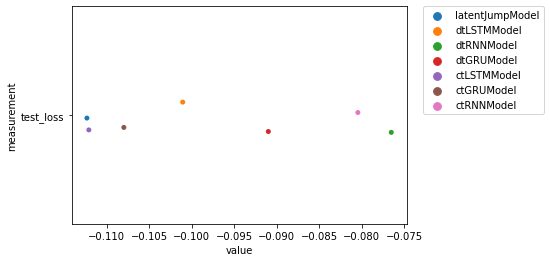

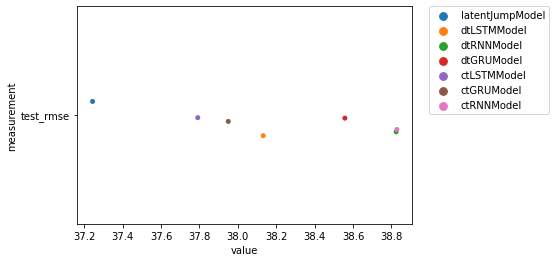

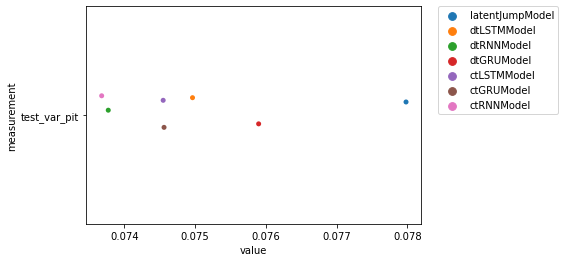

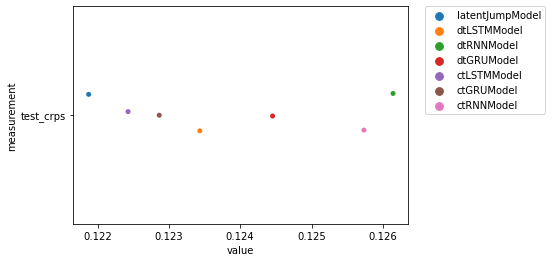

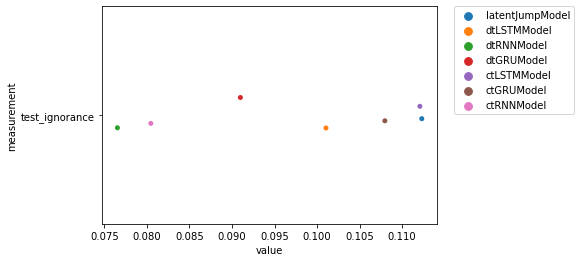

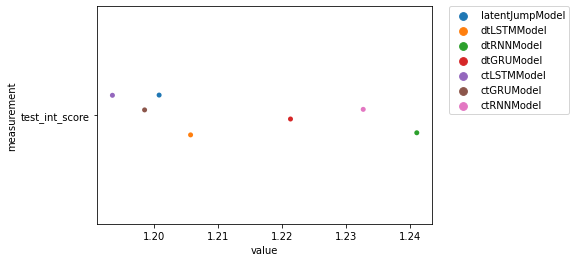

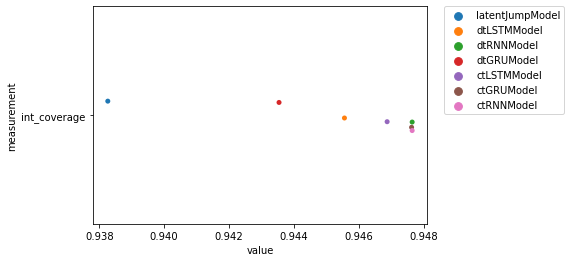

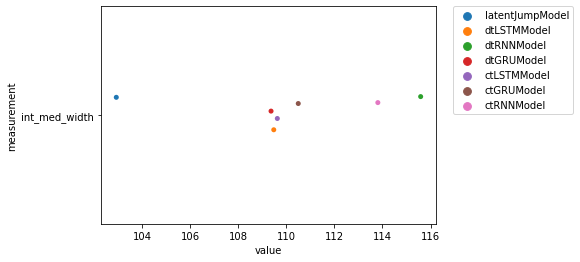

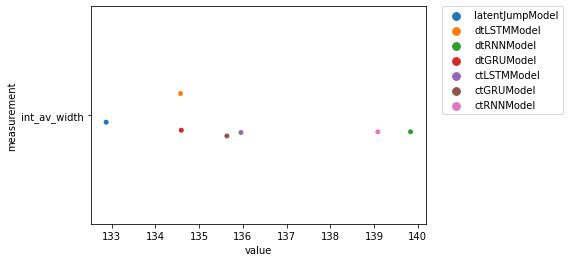

In [111]:
# Initialize the figure
for measure in list(df_test_long.measurement.unique()):
    f, ax = plt.subplots()
    sns.stripplot(x="value", y="measurement", hue="model",
                  data=df_test_long.loc[df_test_long.measurement.isin([measure])])
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(loc="lower")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()